In [24]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

time: 537 µs (started: 2022-05-09 09:18:22 +00:00)


In [55]:
df = pd.read_csv("static_results/static.csv")
df.loc[1, "file_name"] = 'no_stem_laplace'
df.loc[2, "file_name"] = 'no_stem_improved_okapi'
df.loc[3, "file_name"] = 'no_stem_tfidf'
df.loc[5, "file_name"] = 'porter_laplace'
df.loc[6, "file_name"] = 'porter_improved_okapi'
df.loc[7, "file_name"] = 'porter_tfidf'
df.rename(columns = {'file_name' : 'model & stem'}, inplace = True)
df = df.set_index(["model & stem"])
df

,Precision at 10,R-precision,Average Precision
model & stem,,,
no_stem_JM,0.298,0.2404,0.1882
no_stem_laplace,0.022,0.0239,0.0154
no_stem_improved_okapi,0.426,0.2819,0.2269
no_stem_tfidf,0.396,0.2741,0.2139
porter_JM,0.288,0.2201,0.1913
porter_laplace,0.018,0.0206,0.0136
porter_improved_okapi,0.416,0.2983,0.2441
porter_tfidf,0.408,0.2876,0.2320


time: 6.2 ms (started: 2022-05-09 12:06:43 +00:00)


<Figure size 1080x1440 with 0 Axes>

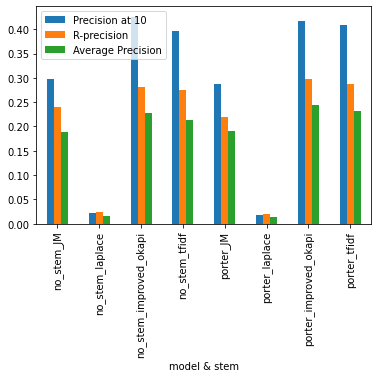

time: 105 ms (started: 2022-05-09 12:06:45 +00:00)


In [56]:
plt.figure(figsize=(15,20))
df.plot.bar()
plt.show()
plt.close()

In [57]:
df.iloc[:4,2].to_numpy()

array([0.1882, 0.0154, 0.2269, 0.2139])

time: 1.3 ms (started: 2022-05-09 12:06:52 +00:00)


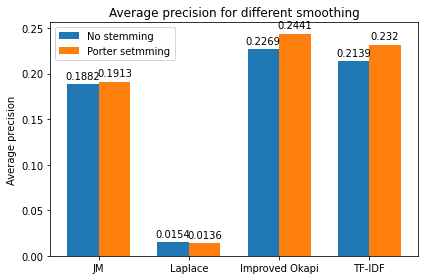

time: 89.1 ms (started: 2022-05-09 12:06:53 +00:00)


In [58]:
labels = ['JM', 'Laplace', 'Improved Okapi', 'TF-IDF']
no_stem = df.iloc[:4,2].to_numpy()
porter =  df.iloc[4:,2].to_numpy()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_stem, width, label='No stemming')
rects2 = ax.bar(x + width/2, porter, width, label='Porter setmming')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average precision')
ax.set_title('Average precision for different smoothing')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()